# Optimisation using Markov Chains 

Markov chains are used to model a series of discrete stochastic events. In this notebook, I set out to find the answers to the below questions by applying a Markov chain model: <br>
1) What is the probability my 18month toddler, Evie, going to bed an hour after having dinner? <br>
2) What is the most optimal bedtime routine to achieve the above?

In [1]:
import numpy as np

In [2]:
# The statespace
states = ["Read", "Dinner", "Bath", "Play", "Sleep"]

# Possible sequence of events
transitionName = [["RR","RD","RB","RP","RS"],
                 ["DR","DD","DB","DP","DS"],
                 ["BR","BD","BB","BP","BS"],
                 ["PR","PD","PB","PP","PS"],
                 ["SR","SD","SB","SP","SS"]]


# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.1,0.1,0.3,0.3],
                   [0.1,0.2,0.5,0.1,0.1],
                   [0.3,0.1,0.1,0.2,0.3],
                   [0.2,0.2,0.3,0.2,0.1],
                   [0.1,0.0,0.0,0.1,0.8]]

transitionMatrixArray = np.array(transitionMatrix)

The transition matrix can be interpreted as the probability of moving from the current state to the next state. For instance, there is a 30% probability that Evie will play after reading a book. 

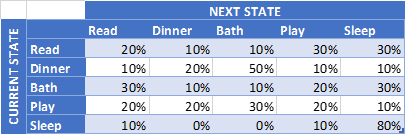

In [3]:
# Function to check if probabilities in each row sum to 1

def check_transition_matrix(matrix):
    
    for i in range(len(matrix)):
        
        if round(sum(matrix[i]),2) != 1:
            return f'Probabilities do not sum to 1 in row {i}. {sum(matrix[i])}'
        
        return f'All probabilities sum to 1'

check_transition_matrix(transitionMatrixArray)

'All probabilities sum to 1'

In [4]:
# Function that implements the Markov model to forecast the state for a single iteration

def activity_forecast(activityNow, increments):
    
    # Store the sequence of states taken
    activityList = [activityNow]
    
    # Initiate counter to record the number of discrete steps in time eg. 15min blocks 
    i = 0
    
    # Calculate the probability of the activityList
    prob = 1
    
    while i != increments:
        if activityNow == "Read":

            change = np.random.choice(transitionName[0], replace = True,p=transitionMatrixArray[0])
            
            if change == "RR":
                prob = prob * transitionMatrixArray[0,0]
                activityList.append("Read") 
                            
            elif change == "RD":
                prob = prob * transitionMatrixArray[0,1]
                activityList.append("Dinner")
                activityNow = "Dinner" # Update current state 
            
            elif change == "RB":
                prob = prob * transitionMatrixArray[0,2]
                activityList.append("Bath")
                activityNow = "Bath"
            
            elif change == "RP":
                prob = prob * transitionMatrixArray[0,3]
                activityList.append("Play")
                activityNow = "Play"
            
            else:
                prob = prob * transitionMatrixArray[0,4]
                activityList.append("Sleep")
                activityNow = "Sleep"
                
        elif activityNow == "Dinner":
            
            change = np.random.choice(transitionName[1], replace = True,p=transitionMatrixArray[1])
            
            if change == "DR":
                prob = prob * transitionMatrixArray[1,0]
                activityList.append("Read")
                activityNow = "Read"
            
            elif change == "DD":
                prob = prob * transitionMatrixArray[1,1]
                activityList.append("Dinner")
                            
            elif change == "DB":
                prob = prob * transitionMatrixArray[1,2]
                activityList.append("Bath")
                activityNow = "Bath"
            
            elif change == "DP":
                prob = prob * transitionMatrixArray[1,3]
                activityList.append("Play")
                activityNow = "Play"
            
            else:
                prob = prob * transitionMatrixArray[1,4]
                activityList.append("Sleep")
                activityNow = "Sleep"
                
        elif activityNow == "Bath":
            
            change = np.random.choice(transitionName[2], replace = True,p=transitionMatrixArray[2])
            
            if change == "BR":
                prob = prob * transitionMatrixArray[2,0]
                activityList.append("Read")
                activityNow = "Read"
            
            elif change == "BD":
                prob = prob * transitionMatrixArray[2,1]
                activityList.append("Dinner")
                activityNow = "Dinner"
            
            elif change == "BB":
                prob = prob * transitionMatrixArray[2,2]
                activityList.append("Bath")
                            
            elif change == "BP":
                prob = prob * transitionMatrixArray[2,3]
                activityList.append("Play")
                activityNow = "Play"
            
            else:
                prob = prob * transitionMatrixArray[2,4]
                activityList.append("Sleep")
                activityNow = "Sleep"
                
        elif activityNow == "Play":
            
            change = np.random.choice(transitionName[3], replace = True,p=transitionMatrixArray[3])
            
            if change == "PR":
                prob = prob * transitionMatrixArray[3,0]
                activityList.append("Read")
                activityNow = "Read"
            
            elif change == "PD":
                prob = prob * transitionMatrixArray[3,1]
                activityList.append("Dinner")
                activityNow = "Dinner"
            
            elif change == "PB":
                prob = prob * transitionMatrixArray[3,2]
                activityList.append("Bath")
                activityNow = "Bath"
            
            elif change == "PP":
                prob = prob * transitionMatrixArray[3,3]
                activityList.append("Play")
                            
            else:
                prob = prob * transitionMatrixArray[3,4]
                activityList.append("Sleep")
                activityNow = "Sleep"
                
        elif activityNow == "Sleep":
            
            change = np.random.choice(transitionName[4], replace = True,p=transitionMatrixArray[4])
            
            if change == "SR":
                prob = prob * transitionMatrixArray[4,0]
                activityList.append("Read")
                activityNow = "Read"
            
            elif change == "SD":
                prob = prob * transitionMatrixArray[4,1]
                activityList.append("Dinner")
                activityNow = "Dinner"
            
            elif change == "SB":
                prob = prob * transitionMatrixArray[4,2]
                activityList.append("Bath")
                activityNow = "Bath"
            
            elif change == "SP":
                prob = prob * transitionMatrixArray[4,3]
                activityList.append("Play")
                activityNow = "Play"
            
            else:
                prob = prob * transitionMatrixArray[4,4]
                activityList.append("Sleep")
                        
        i += 1 
    
    ## Print the results 
    # print(f'Path taken: {activityList}')
    # print(f'End state after {increments} 15 min blocks: {activityNow}')
    # print(f'Probability of path:{prob}')
    
    return activityList, prob

In [5]:
# Function to calculate probability of starting at a specified state and ending at a specified state 

def markov_prob(startState, endState, increments):
    
    # Save every activityList ie. every combination of possible activities in the next hour, given Evie is currently having dinner
    list_activity = []

    # Initiate counter to record number of routes to get from specified start state to specified end state
    count = 0 
    
    # Initiate probability 
    max_prob = 0 

    # Run function activity_forecast 10000 times
    for i in range(1,10000):
        list_activity.append(activity_forecast(startState,increments))
    
    # Iterate through the list to get a count of all activities ending in state: 'Sleep' and identify the optimal path
    for i_list in list_activity:
        if i_list[0][-1] == endState:
            count += 1
            if i_list[1] > max_prob:
                max_prob = i_list[1]
                bestRoutine = i_list[0]
    
    # Calculate the probability of starting at state: 'Dinner' and ending at state: 'Sleep'
    percentage = (count/10000) * 100
    
    print(f'The probability of starting at state: "{startState}" and ending at state: "{endState}" is {percentage}%.')
    print(f'{bestRoutine} is the routine with the highest probability {max_prob*100}% of achieving state:"{endState}" in {(increments*15)/60} hour(s).')

In [6]:
# Call markov_prob function 

markov_prob("Dinner","Sleep",4)

The probability of starting at state: "Dinner" and ending at state: "Sleep" is 44.080000000000005%.
['Dinner', 'Bath', 'Sleep', 'Sleep', 'Sleep'] is the routine with the highest probability 9.6% of achieving state:"Sleep" in 1.0 hour(s).


<b> Assumptions and Limitations of Markov Model </b> <br>
Let's review some of the assumptions of the Markov Model in the context of this sleep routine optimisation problem to determine where this model will fall short. <br>
<br>
<b> Assumption 1: </b> The transition probabilities are constant over time. <br>
This is not a bad assumption for this problem if we have dinner around the same time every night and given that we're only predicting an hour ahead. This assumption presumes Evie's probability of going to bed at say 7PM is the same as her probability of going to bed at 11PM. <br>
<br>
<b> Assumption 2: </b> The probabilities apply to all participants in the system. <br>
This is not an issue for this problem as I am only modelling the events for a single toddler. This assumption needs to be reviewed if the Markov Model is to be applied to multiple participants - do they all have the same probabilities in the transition matrix? <br>
<br>
<b> Assumption 3:</b> The probability of transitioning to the next state is solely dependent on the current state. <br>
This assumption presumes that if Evie had a bath 30 minutes ago, she is still as likely to have another bath. 


<b> Conclusion </b> <br>
On any given night, my 18month toddler has about a 44% chance of being in bed an hour after dinner. The optimal sleep routine is a simple one: after having dinner and a bath, I should put Evie straight to bed. This routine has a 9.6% chance of success. That's not a very high probability. Wish me luck! <br>